# Shoreline Data

In [1]:
from osgeo import gdal, gdal_array, osr, ogr
import numpy as np
import rasterio
#from affine import Affine
import pyproj
import pandas as pd
from shapely.geometry import Point
from geopandas import GeoDataFrame
import geopandas as gpd

## Load shoreline data

In [2]:
shoreline_data = gpd.read_file('/workspace/w210/Shoreline/NYC_2017_LiDAR_Low_Tide_Shoreline.shp')

In [3]:
shoreline_data.head()

,Feature,Type,geometry
0,Shoreline,Bathymetric - low tide,"LINESTRING Z (914245.542 119924.624 0.000, 914..."
1,Shoreline,Bathymetric - low tide,"LINESTRING Z (921853.440 120210.369 0.000, 921..."
2,Shoreline,Bathymetric - low tide,"LINESTRING Z (919613.833 121459.244 0.000, 919..."
3,Shoreline,Bathymetric - low tide,"LINESTRING Z (919666.992 121515.874 0.000, 919..."
4,Shoreline,Bathymetric - low tide,"LINESTRING Z (921742.418 121910.178 0.000, 921..."


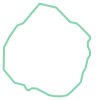

In [10]:
shoreline_data['geometry'][0]

In [4]:
#view shoreline_data coordinate reference system
shoreline_data.crs

<Derived Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

## Approach #1: Convert  lines into a raster where pixel values are equal to the number of lines passing through the cell?

In [7]:
#view shapefile metadata
shoreline_data.type

0           LineString
1           LineString
2           LineString
3           LineString
4           LineString
            ...       
297         LineString
298         LineString
299         LineString
300    MultiLineString
301    MultiLineString
Length: 302, dtype: object

In [8]:
#Find extent of area of interest
shoreline_data.bounds

,minx,miny,maxx,maxy
0,9.142370e+05,119922.011858,9.142696e+05,119956.869342
1,9.218369e+05,120208.088189,9.218926e+05,120263.605000
2,9.195835e+05,121446.699764,9.196371e+05,121463.260638
3,9.196508e+05,121459.197847,9.196847e+05,121527.971415
4,9.216673e+05,121869.531187,9.217806e+05,121985.378001
...,...,...,...,...
297,1.019262e+06,248828.956672,1.019296e+06,248985.578564
298,1.018991e+06,255210.391777,1.019390e+06,255713.960911
299,1.016232e+06,236767.685340,1.025088e+06,271279.304200
300,1.002874e+06,235606.103892,1.025060e+06,271286.575972


In [19]:
#Create list of geometry column of shoreline data
shoreline_data_shapes = shoreline_data['geometry'].values.tolist()
shoreline_data_shapes[0:10]

In [ ]:
#specifiy shape of output grid in pixel units
zones_array_output_shape = shoreline_data.shape[1:]
#Project from pixel space to coordinate space
#shoreline_transform = shoreline_data.rio.transform()

In [22]:
#convert a polyline to a single point using arcpy
import arcpy

ModuleNotFoundError: No module named 'arcpy'